In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generata sample data with non-linear pattern
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X.ravel() ** 2 - 3 * X.ravel() + 5 + np.random.normal(0, 3, 100)

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

In [9]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [11]:
"""
X: [5, 2, 8, 1, 6]
y: [10, 4, 16, 2, 12]

X_sorted = X[sort_idx]  # [1, 2, 5, 6, 8]
y_sorted = y[sort_idx]  # [2, 4, 10, 12, 16]


Now plotting creates a **smooth line** from left to right:

(1,2) → (2,4) → (5,10) → (6,12) → (8,16)

"""

# Sort for plotting 
sort_idx_train = np.argsort(X_train.ravel())
sort_idx_test = np.argsort(X_test.ravel())

###  Model 1. Simple linear (UNDERFITTING - too simple for the data)

In [15]:
# Model 1. Simple linear (UNDERFITTING - too simple for the data)

underfit_model = LinearRegression()
underfit_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_train_pred_under = underfit_model.predict(X_train)
y_test_pred_under = underfit_model.predict(X_test)

train_r2_under = r2_score(y_train, y_train_pred_under)
test_r2_under = r2_score(y_test, y_test_pred_under)
train_mse_under = mean_squared_error(y_train, y_train_pred_under)
test_mse_under = mean_squared_error(y_test, y_test_pred_under)

print(f"Training R2 Score: {train_r2_under:.4f} (How well it fits training data)")
print(f"Test R2 Score:     {test_r2_under:.4f}  (How well it generalizes)")
print(f"Training MSE:      {train_mse_under:.2f}")
print(f"Test MSE:          {test_mse_under:.2f}")
print(f"Gap (R2):          {abs(train_r2_under - test_r2_under):.4f}\n\n")

Training R2 Score: 0.6162 (How well it fits training data)
Test R2 Score:     0.5241  (How well it generalizes)
Training MSE:      24.04
Test MSE:          19.46
Gap (R2):          0.0920




Text(0.5, 0.95, '⚠️ Both scores LOW\n(testR2|trainR2)')

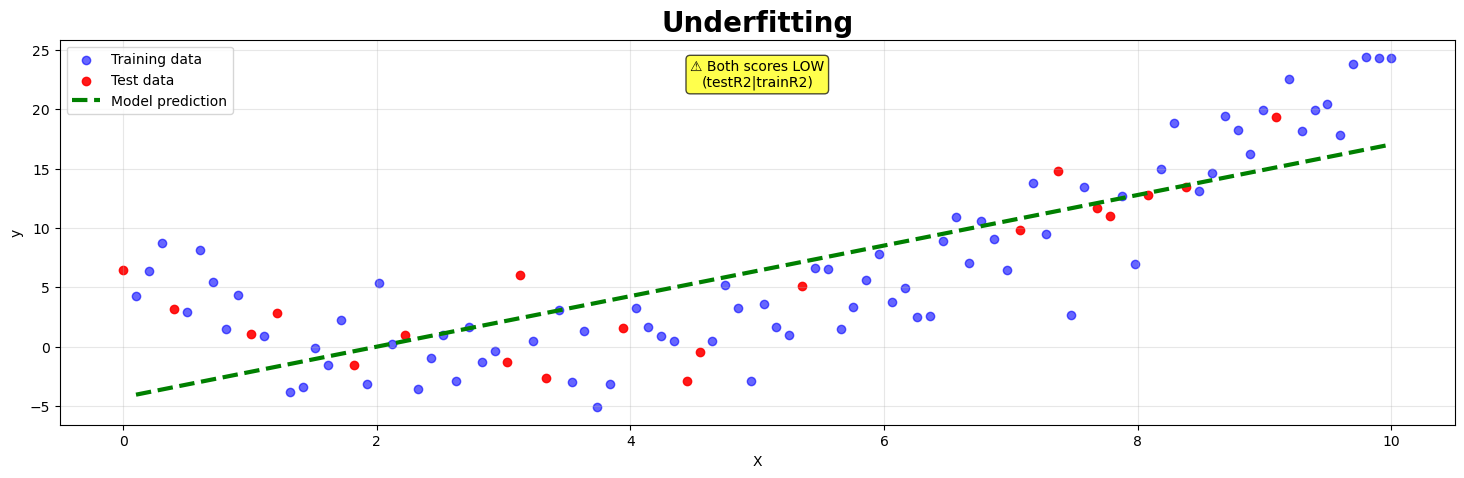

In [80]:
fig, axes = plt.subplots(figsize = (18,5))
axes.scatter(X_train, y_train, alpha = 0.6, label = "Training data", color = "blue")
axes.scatter(X_test, y_test, alpha = 0.9, label = "Test data", color = "red")
axes.plot(X_train[sort_idx_train], y_train_pred_under[sort_idx_train],
          "g--", linewidth = 3, label = "Model prediction")
axes.set_title(f"Underfitting", fontsize = 20, fontweight = "bold")
axes.set_xlabel("X")
axes.set_ylabel("y")
axes.legend()
axes.grid(True, alpha = 0.3)
axes.text(0.5, 0.95, '⚠️ Both scores LOW\n(testR2|trainR2)', transform=axes.transAxes,
            ha='center', va='top', bbox=dict(boxstyle='round', facecolor='yellow', 
                                             alpha=0.7))

### SIGNS OF UNDERFITTING
- Both training and test scores are LOW (< 0.7 typically)
- Small gap between training and test performance
- Model is too simple to capture the pattern in data
- High bias, low variance

### Solutions for UNDERFITTING
- Use more complex model (polynomial features, more parameters)
- Add more features
- Reduce regularization (lower alpha)
- Train longer (more epochs for NNs)





- ---------------------------------------------------------------------------------

### 2. Model 2. Very high degree polynomial (OVERFITTING - too complex)

In [96]:
# Model 2. Very high degree polynomial (overfitting - too complex)
poly_overfit = PolynomialFeatures(degree = 45) #Way too complex
X_train_poly_over = poly_overfit.fit_transform(X_train)
X_test_poly_over = poly_overfit.transform(X_test)

overfit_model = LinearRegression()
overfit_model.fit(X_train_poly_over, y_train)

y_train_pred_over = overfit_model.predict(X_train_poly_over)
y_test_pred_over = overfit_model.predict(X_test_poly_over)

train_r2_over = r2_score(y_train, y_train_pred_over)
test_r2_over = r2_score(y_test, y_test_pred_over)
train_mse_over = mean_squared_error(y_train, y_train_pred_over)
test_mse_over = mean_squared_error(y_test, y_test_pred_over)

print(f"Training R2 Score: {train_r2_over:.4f}")
print(f"Test R2 Score:     {test_r2_over:.4f}")
print(f"Training MSE:      {train_mse_over:.2f}")
print(f"Test MSE:          {test_mse_over:.2f}")
print(f"Gap (R2):          {abs(train_r2_over - test_r2_over):.4f}\n\n")

Training R2 Score: 0.7876
Test R2 Score:     0.6962
Training MSE:      13.30
Test MSE:          12.42
Gap (R2):          0.0914




Text(0.5, 0.95, '⚠️ Large Gap!')

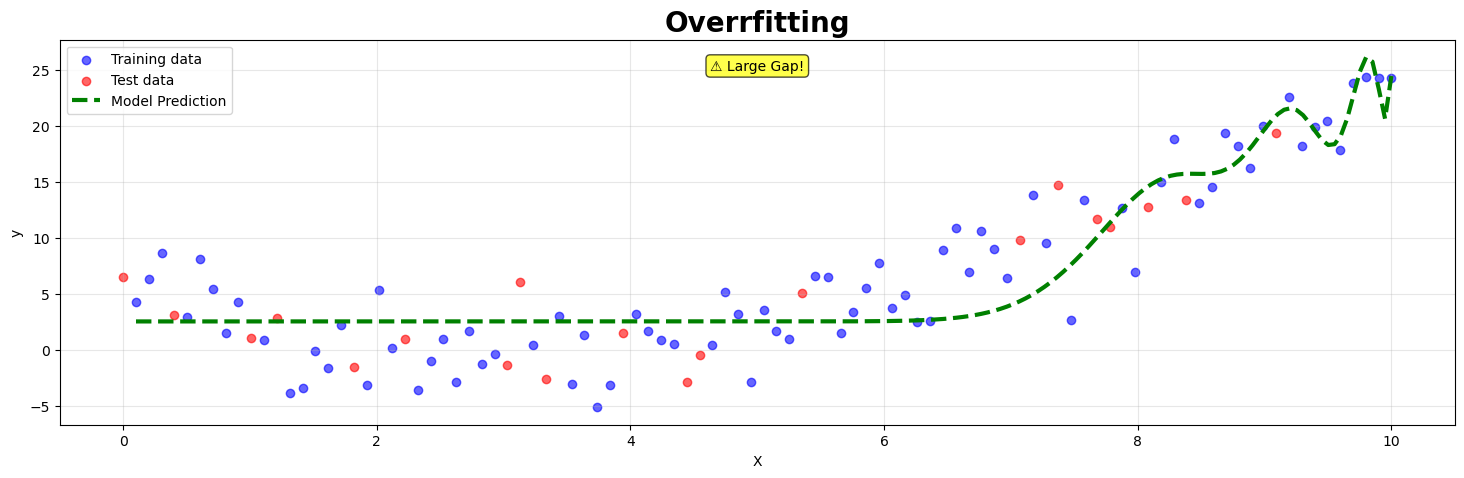

In [100]:
fig, axes = plt.subplots(figsize = (18,5))
axes.scatter(X_train, y_train, alpha = 0.6, label = "Training data", color = "blue")
axes.scatter(X_test, y_test, alpha = 0.6, label = "Test data", color = "red")
# Adding a smooth line 
X_plot = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
X_plot_poly = poly_overfit.transform(X_plot)
y_plot_over = overfit_model.predict(X_plot_poly)
axes.plot(X_plot, y_plot_over, "g--", linewidth = 3, label = "Model Prediction")
axes.set_title(f"Overrfitting", fontsize = 20, fontweight = "bold")
axes.set_xlabel("X")
axes.set_ylabel("y")
axes.legend()
axes.grid(True, alpha = 0.3)
axes.text(0.5, 0.95, '⚠️ Large Gap!', transform=axes.transAxes,
            ha='center', va='top', bbox=dict(boxstyle='round', facecolor='yellow', 
                                             alpha=0.7))




In [114]:
### Model 3. Polynomial with Ridge reqularization

poly_good = PolynomialFeatures(degree = 5) #Moderate complexity 
X_train_poly_good = poly_good.fit_transform(X_train)
X_test_poly_good = poly_good.transform(X_test)

# Apply Ridge to prevent overfitting 
goodfit_model = Ridge(alpha = 10.0)
goodfit_model.fit(X_train_poly_good, y_train)

y_train_pred_good = goodfit_model.predict(X_train_poly_good)
y_test_pred_good = goodfit_model.predict(X_test_poly_good)


train_r2_good = r2_score(y_train, y_train_pred_good)
test_r2_good  = r2_score(y_test, y_test_pred_good)
train_mse_good = mean_squared_error(y_train, y_train_pred_good)
test_mse_good = mean_squared_error(y_test, y_test_pred_good)

print(f"Training R2 Score: {train_r2_good:.4f}")
print(f"Test R2 Score:     {test_r2_good:.4f}")
print(f"Training MSE:      {train_mse_good:.2f}")
print(f"Test MSE:          {test_mse_good:.2f}")
print(f"Gap (R2):          {abs(train_r2_good - test_r2_good):.4f}\n\n")

Training R2 Score: 0.8778
Test R2 Score:     0.8667
Training MSE:      7.65
Test MSE:          5.45
Gap (R2):          0.0112




Text(0.5, 0.95, '✅ Small!')

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


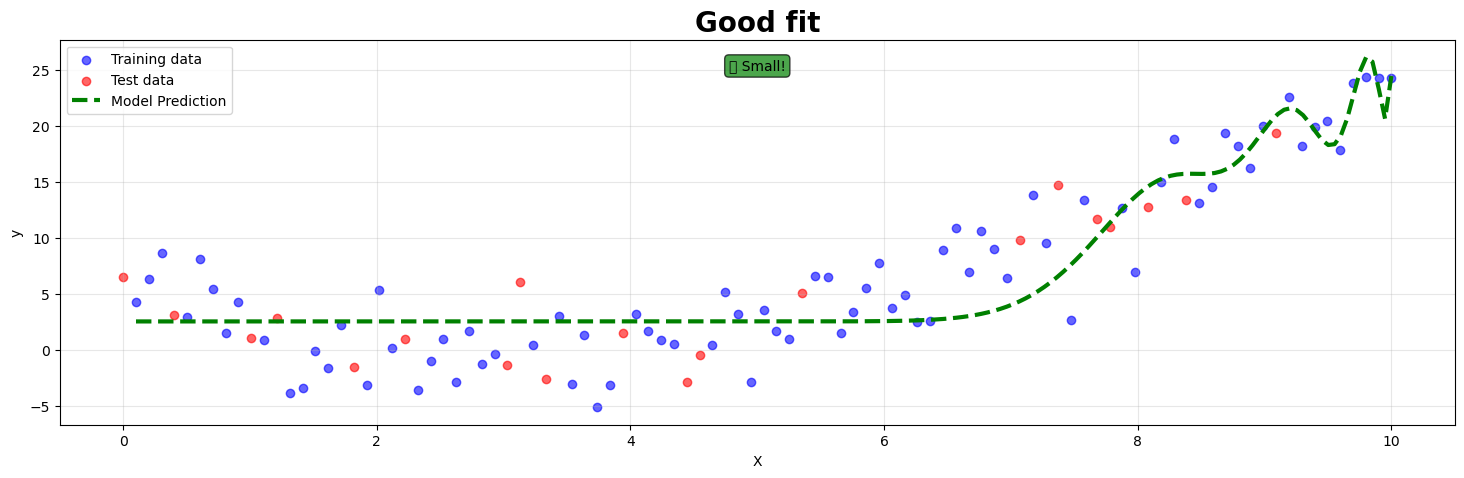

In [126]:
fig, axes = plt.subplots(figsize = (18,5))
axes.scatter(X_train, y_train, alpha = 0.6, label = "Training data", color = "blue")
axes.scatter(X_test, y_test, alpha = 0.6, label = "Test data", color = "red")
# Adding a smooth line 
X_plot_poly_good = poly_good.transform(X_plot)
y_plot_good = goodfit_model.predict(X_plot_poly_good)
axes.plot(X_plot, y_plot_over, "g--", linewidth = 3, label = "Model Prediction")
axes.set_title(f"Good fit", fontsize = 20, fontweight = "bold")
axes.set_xlabel("X")
axes.set_ylabel("y")
axes.legend()
axes.grid(True, alpha = 0.3)
axes.text(0.5, 0.95, '✅ Small!', transform=axes.transAxes,
            ha='center', va='top', bbox=dict(boxstyle='round', facecolor='green', 
                                             alpha=0.7))

